# <center> TASK - 2: Prediction using Unsupervised ML </center>

#### By Gyanada Sharma

Importing the libraries:

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

from sklearn import datasets
from sklearn.cluster import KMeans 
from sklearn.metrics import classification_report, confusion_matrix

Importing the dataset:

In [55]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [59]:
df.shape

(150, 4)

In [60]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for null values:

In [61]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Checking for duplicates:

In [62]:
df.duplicated().sum()

1

Visualizations:

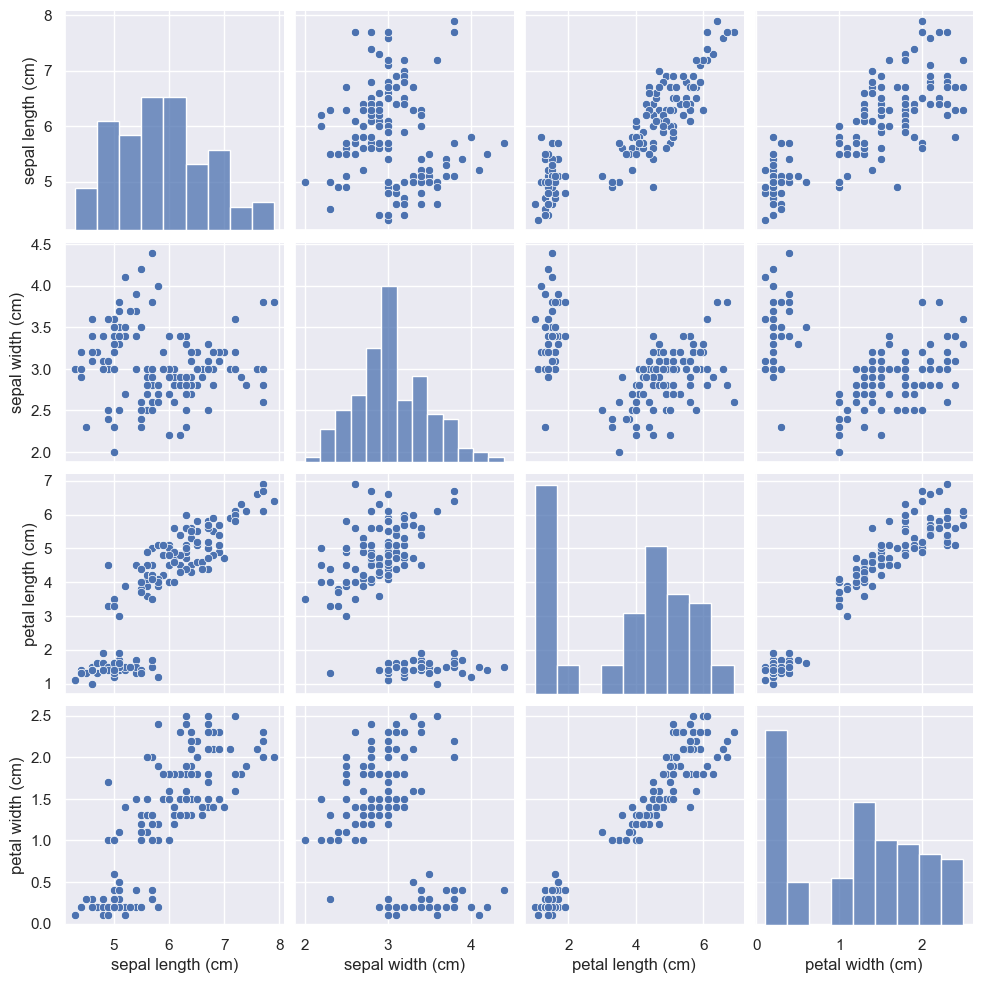

In [89]:
sns.pairplot(df)

<Axes: >

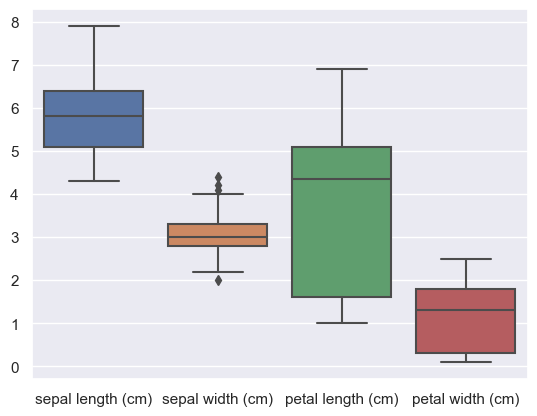

In [88]:
sns.boxplot(df)

Text(0.5, 1.0, 'Correlation between Variables')

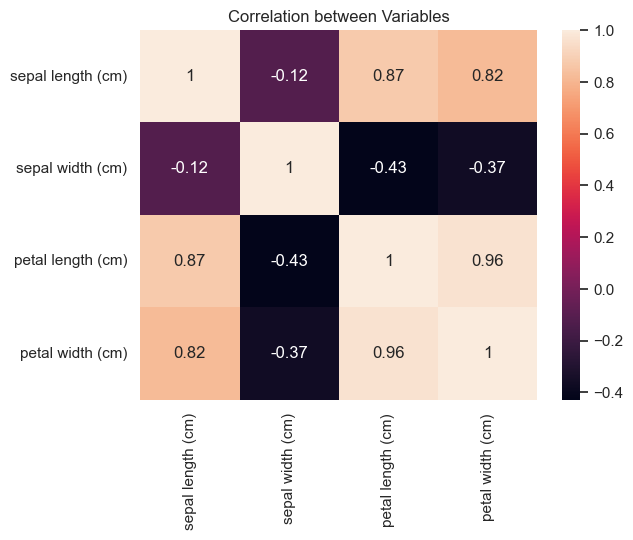

In [64]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between Variables')

Checking for relationship between Petal Width and Petal Length as it has correlation of 0.96:

Text(0.5, 1.0, 'Petal Width vs Petal Length')

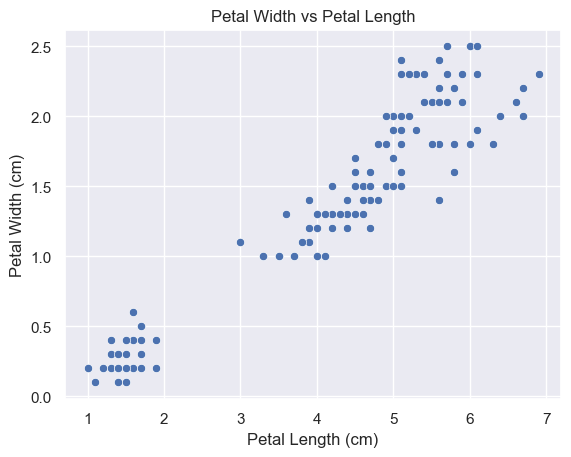

In [65]:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Width vs Petal Length')

Checking for relationship between Sepal Length and Petal Length as it has correlation of 0.87:

Text(0.5, 1.0, 'Sepal Length vs Petal Length')

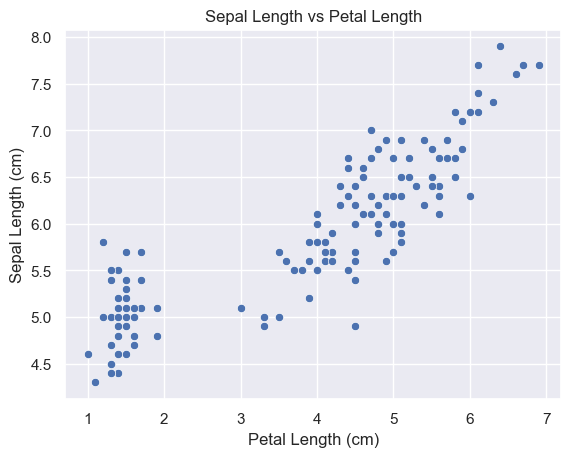

In [66]:
sns.scatterplot(x=df['petal length (cm)'], y=df['sepal length (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length vs Petal Length')

Checking for relationship between Petal Width and Sepal Length as it has correlation of 0.82:

Text(0.5, 1.0, 'Petal Width vs Sepal Length')

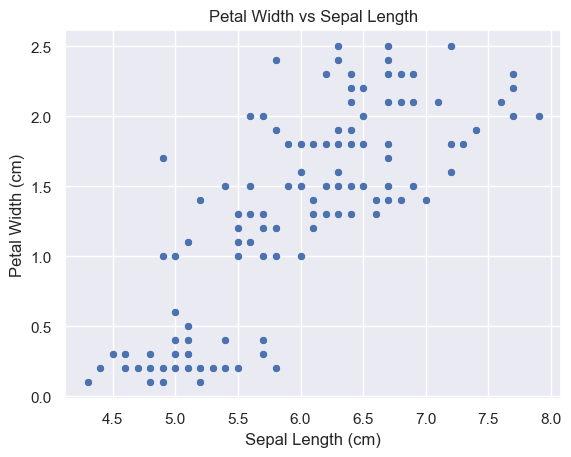

In [67]:
sns.scatterplot(x=df['sepal length (cm)'], y=df['petal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Width vs Sepal Length')

Training the model:

In [68]:
X = df

Checking for the best K values:

Text(0, 0.5, 'WCSS')

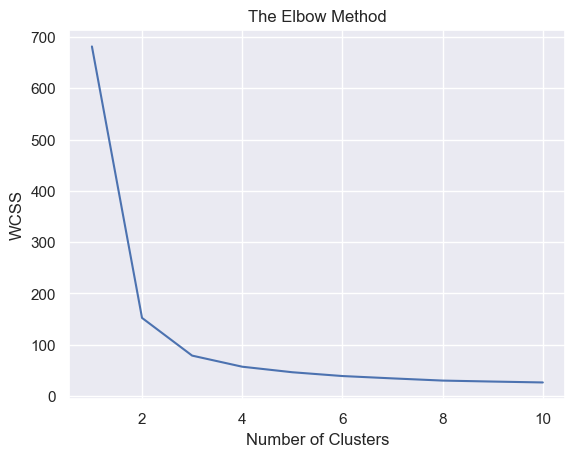

In [69]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Finally training the model using k=3:

In [70]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

Plotting the results:

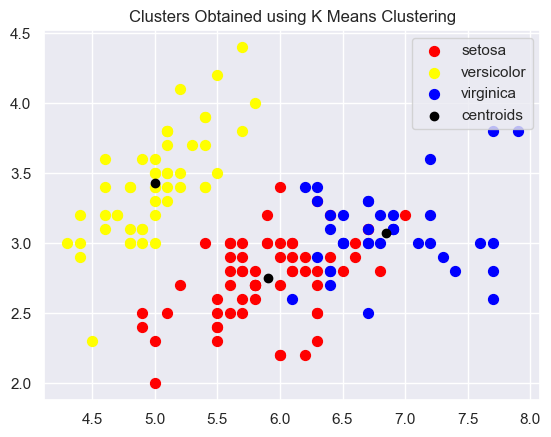

In [86]:
plt.scatter(X.iloc[y_kmeans==0,0], X.iloc[y_kmeans==0, 1], color='red', s=50, label='setosa')
plt.scatter(X.iloc[y_kmeans==1,0], X.iloc[y_kmeans==1, 1], color='yellow', s=50, label='versicolor')
plt.scatter(X.iloc[y_kmeans==2,0], X.iloc[y_kmeans==2, 1], color='blue', s=50, label='virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', label='centroids')

plt.title('Clusters Obtained using K Means Clustering')
plt.legend()